In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

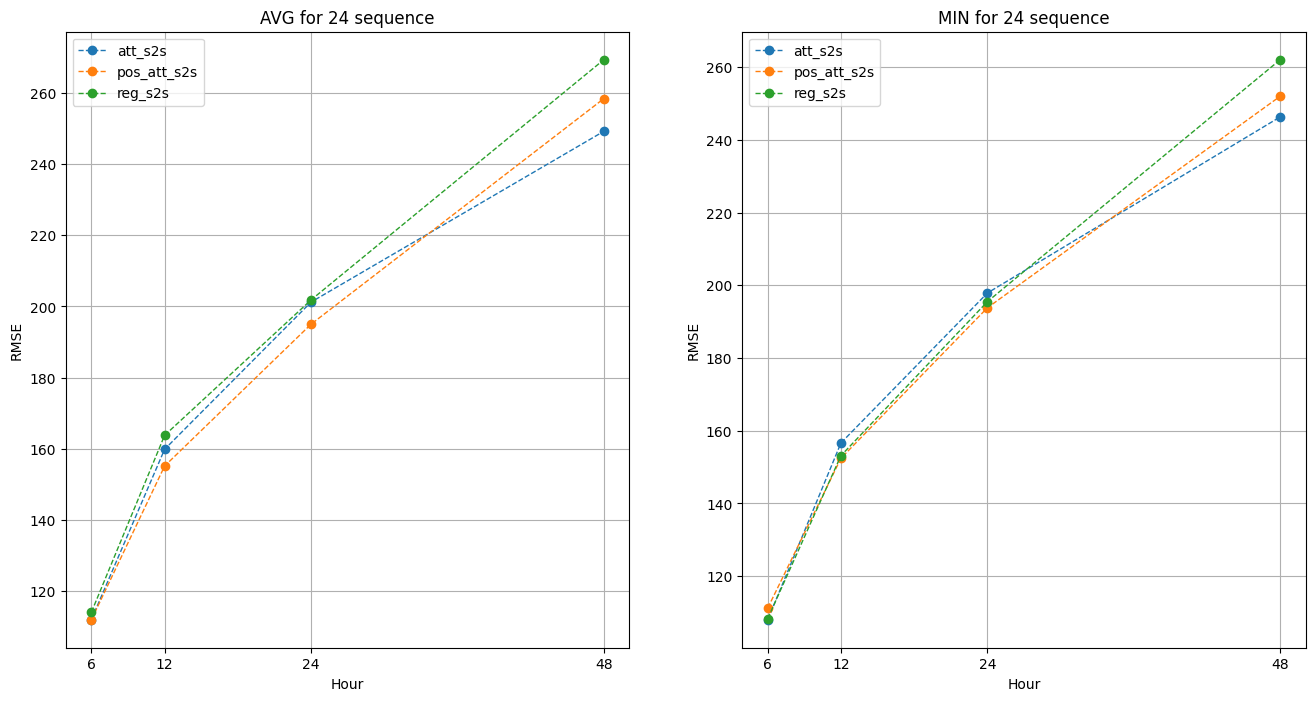

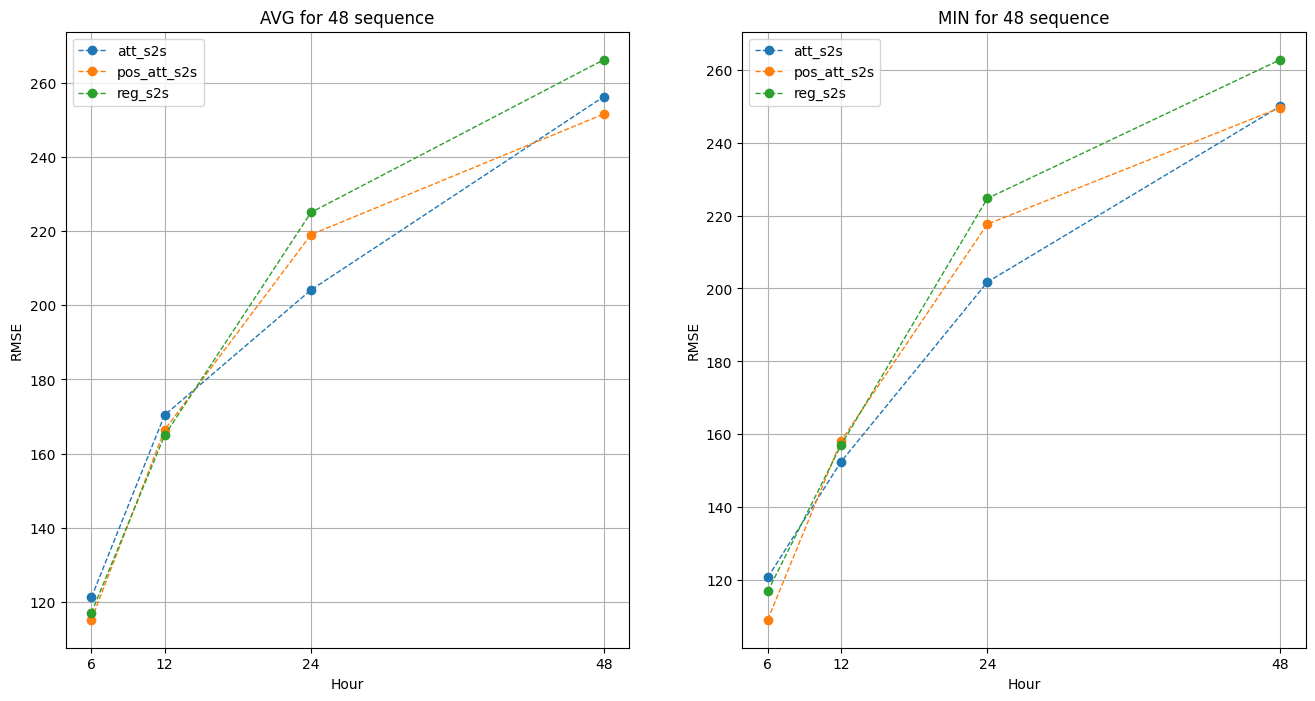

In [2]:
def plot_per_model(data: pd.DataFrame, axs=None, title=None):
    """Make sure to call plt.show() after figure is done."""
    if axs is None:
        plt.title(title)
        plt.xlabel('Hour')
        plt.ylabel('RMSE')
        plt.xticks([6, 12, 24, 48])
        plt.grid()
        axs = plt
    else:
        axs.set_title(title)
        axs.set_xlabel('Hour')
        axs.set_ylabel('RMSE')
        axs.set_xticks([6, 12, 24, 48])
        axs.grid()
    
    for m in data['Model'].unique():
        per_model = data[data['Model'] == m].drop('Model', axis=1).to_numpy()
        x, y = per_model[:, 0], per_model[:, 1]
        axs.plot(x, y, marker='o', linewidth=1, linestyle='dashed', label=m)
        
        axs.legend()
    
def plot_for_len(data: pd.DataFrame, seq_len=24):
    gp = data.groupby(['Model', 'Sequence length', 'Prediction length'], as_index=False)[['Model', 'RMSE']]

    gmean = gp.mean(['RMSE'])
    gmin = gp.min(['RMSE'])
    
    gmean = gmean[gmean['Sequence length'] == seq_len].drop('Sequence length', axis=1)
    gmin = gmin[gmin['Sequence length'] == seq_len].drop('Sequence length', axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    
    plot_per_model(gmean, axs[0], f'AVG for {seq_len} sequence')
    plot_per_model(gmin, axs[1], f'MIN for {seq_len} sequence')
    plt.show()
    
df = pd.read_csv('final_eval_results/results.csv')

plot_for_len(df, 24)
plot_for_len(df, 48)